In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
df['sex'].replace('.','FEMALE',inplace=True)
df = df.dropna()
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

### Train Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Random Forest

In [24]:
#help(RandomForestClassifier)
rf = RandomForestClassifier(n_estimators=10, max_features='auto',random_state=101)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adel

## Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
confusion_matrix(y_test,y_pred)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [27]:
rf.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

### Choosing correct number of trees

In [42]:
test_error = []

for n in range(1,128):
    rf1 = RandomForestClassifier(n_estimators=n,max_features='sqrt',random_state=150)
    rf1.fit(X_train,y_train)
    pred = rf1.predict(X_test)
    test_error.append(1-accuracy_score(pred,y_test))

In [43]:
test_error

[0.04950495049504955,
 0.04950495049504955,
 0.01980198019801982,
 0.01980198019801982,
 0.02970297029702973,
 0.01980198019801982,
 0.02970297029702973,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.02970297029702973,
 0.01980198019801982,
 0.02970297029702973,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.02970297029702973,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.02970297029702973,
 0.02970297029702973,
 0.02970297029702973,
 0.0297029

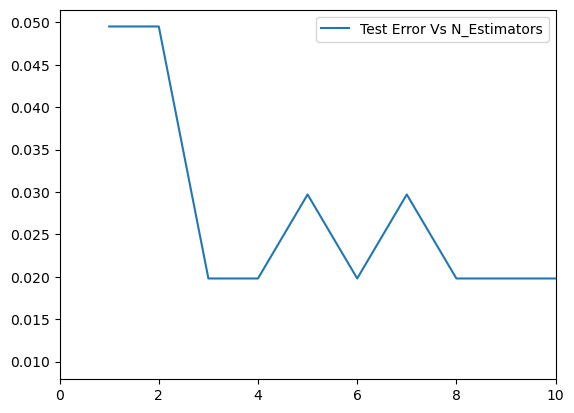

In [44]:
plt.plot(range(1,128),test_error,label='Test Error Vs N_Estimators')
plt.legend()
plt.xlim(0,10);